In [13]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


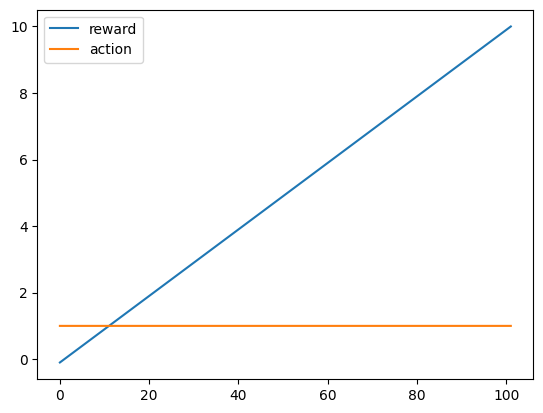

In [43]:
from stable_baselines3 import TD3, DDPG
from stable_baselines3.common.evaluation import evaluate_policy
from src.environment.dummy import Dummy, LoggingCallback
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np

env = Dummy()
env.coefficient = 0.7
model = DDPG("MlpPolicy", env, train_freq=(30, "step"), action_noise=NormalActionNoise(np.array([1]),np.array([0.1])))
model.learn(total_timesteps=1000)
trained_callback = LoggingCallback()
trained_accumulated_reward, trained_std_reward = evaluate_policy(model, env, n_eval_episodes=1, callback=trained_callback)
plt.plot([el["reward"] for el in trained_callback.infos], label="reward")
plt.plot([el["action"] for el in trained_callback.infos], label="action")
plt.legend()
plt.show()